In [28]:
import datetime
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)


# Loading data

In [29]:
PICKLE_TRAIN_DIR=os.path.join("..", 'processed_data', 'train_data.pkl')
PICKLE_PRICING_DIR=os.path.join("..", 'processed_data', 'pricing_data.pkl')

In [30]:
train_data=pd.read_pickle(PICKLE_TRAIN_DIR)
pricing_data=pd.read_pickle(PICKLE_PRICING_DIR)

# Feature emgineering

In [31]:
#
mean_year=pricing_data.groupby(['id']).mean().reset_index()

In [32]:
mean_year=mean_year.rename(columns={'price_p1_var':'mean_year_price_p1_var', 
                                    'price_p2_var':'mean_year_price_p2_var',
                                    'price_p3_var':'mean_year_price_p3_var', 
                                    'price_p1_fix':'mean_year_price_p1_fix',
                                    'price_p2_fix':'mean_year_price_p2_fix', 
                                    'price_p3_fix':'mean_year_price_p3_fix'})
mean_year['mean_year_price_p1']=mean_year['mean_year_price_p1_var']+mean_year['mean_year_price_p1_fix']
mean_year['mean_year_price_p2']=mean_year['mean_year_price_p2_var']+mean_year['mean_year_price_p2_fix'] 
mean_year['mean_year_price_p3']=mean_year['mean_year_price_p3_var']+mean_year['mean_year_price_p3_fix']

In [33]:
mean_year

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414


In [34]:
#define a new variable
train_data['tenure_year']=((train_data['date_end']-train_data['date_activ'])/np.timedelta64(1, 'Y')).astype(int)

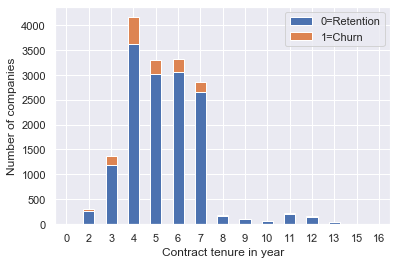

In [35]:
train_data['tenure_year'].groupby([train_data['tenure_year'],train_data['churn']]).count().unstack(level=1).plot(kind='bar',stacked=True)
plt.xticks(rotation=1)
plt.xlabel("Contract tenure in year")
plt.ylabel("Number of companies")
plt.legend(["0=Retention","1=Churn"])
plt.show()

The churn is very low for companies which joined recently or that have made the contraft a long time ago. The companies with 3-7 yars of contract have higher churn rate. 

In [36]:
def convert_months(dataframe, column):
    reference_date=datetime.datetime(2016,1,1)
    timedelta=reference_date-dataframe[column]
    months=(timedelta/np.timedelta64(1,'M')).astype(int)
    return months

In [37]:
train_data['months_activ']=convert_months(train_data, 'date_activ')
train_data['months_to_end']=convert_months(train_data, 'date_end')
train_data['months_modif_prod']=convert_months(train_data, 'date_modif_prod')
train_data['months_renewal']=convert_months(train_data, 'date_renewal')

In [38]:
train_data.drop(columns=['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'],inplace=True)

In [40]:
#transfoorm boolean data(one hot encoding)
train_data['has_gas']=train_data['has_gas'].replace(['t','f'],[1,0])

## Categorical data and dummy variables

### Channel_sales

In [41]:
#repalce nan values with string 
train_data['channel_sales']=train_data['channel_sales'].fillna('null_values_channel')

In [42]:
#transform to categorical data type
train_data['channel_sales']=train_data['channel_sales'].astype('category')

In [43]:
#create dummy variables
categories_channel=pd.get_dummies(train_data['channel_sales'],prefix='channel')

In [44]:
#rename columns for simplicity
categories_channel.columns=[col_name[:11] for col_name in categories_channel.columns]

In [45]:
#drop column for because of multicollinearity
categories_channel.drop(columns=['channel_nul'],inplace=True)

### Origin_up

In [46]:
train_data['origin_up']=train_data['origin_up'].fillna('null_values_origin')

In [47]:
train_data['origin_up']=train_data['origin_up'].astype('category')

In [48]:
categories_origin=pd.get_dummies(train_data['origin_up'], prefix='origin')

In [49]:
categories_origin.columns=[col_name[:10] for col_name in categories_origin.columns]

In [50]:
categories_origin.drop(columns=['origin_nul'],inplace=True)

### Activity_new

In [51]:
train_data['activity_new']=train_data['activity_new'].fillna('null_values_activity')

In [52]:
to_replace=list(train_data['activity_new'].value_counts().loc[lambda x: x<=75].index)

In [53]:
train_data['activity_new']=train_data['activity_new'].replace(to_replace,'null_values_activity')

In [54]:
categories_activity=pd.get_dummies(train_data['activity_new'],prefix='activity')

In [55]:
categories_activity.columns=[col_name[:12] for col_name in categories_activity.columns]

In [56]:
categories_activity

,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_nul,activity_sfi,activity_wxe
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
16091,0,0,0,0,0,0,0,1,0,0
16092,0,0,0,0,0,0,0,1,0,0
16093,0,0,0,0,0,0,0,1,0,0
16094,0,0,0,0,0,0,0,1,0,0


In [57]:
categories_activity.drop(columns=['activity_nul'],inplace=True)

### Merge dummy variables 

In [58]:
train_data=pd.merge(train_data, categories_channel,left_index=True, right_index=True)
train_data=pd.merge(train_data, categories_origin,left_index=True, right_index=True)
train_data=pd.merge(train_data, categories_activity,left_index=True, right_index=True)

In [59]:
train_data.drop(columns=['channel_sales','origin_up','activity_new'],inplace=True)

## Log transformation for skewed data

In [60]:
train_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
count,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,...,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,...,0.000124,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.005157,0.007393
std,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,...,0.011147,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.071626,0.085668
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
# remove negative vales 
train_data.loc[train_data.cons_12m<0, 'cons_12m']=np.nan
train_data.loc[train_data.cons_gas_12m<0, 'cons_gas_12m']=np.nan
train_data.loc[train_data.cons_last_month<0, 'cons_last_month']=np.nan
train_data.loc[train_data.forecast_cons_12m<0, 'forecast_cons_12m']=np.nan
train_data.loc[train_data.forecast_cons_year<0, 'forecast_cons_year']=np.nan
train_data.loc[train_data.forecast_meter_rent_12m<0, 'forecast_meter_rent_12m']=np.nan
train_data.loc[train_data.imp_cons<0, 'imp_cons']=np.nan

In [62]:
#apply log 10 transformation
train_data['cons_12m'] =np.log10(train_data['cons_12m']+1)
train_data['cons_gas_12m']= np.log10(train_data['cons_gas_12m']+1)
train_data['cons_last_month']= np.log10(train_data['cons_last_month']+1)
train_data['forecast_cons_12m']= np.log10(train_data['forecast_cons_12m']+1)
train_data['forecast_cons_year']= np.log10(train_data['forecast_cons_year']+1)
train_data['forecast_meter_rent_12m']= np.log10(train_data['forecast_meter_rent_12m']+1)
train_data['imp_cons']= np.log10(train_data['imp_cons']+1)

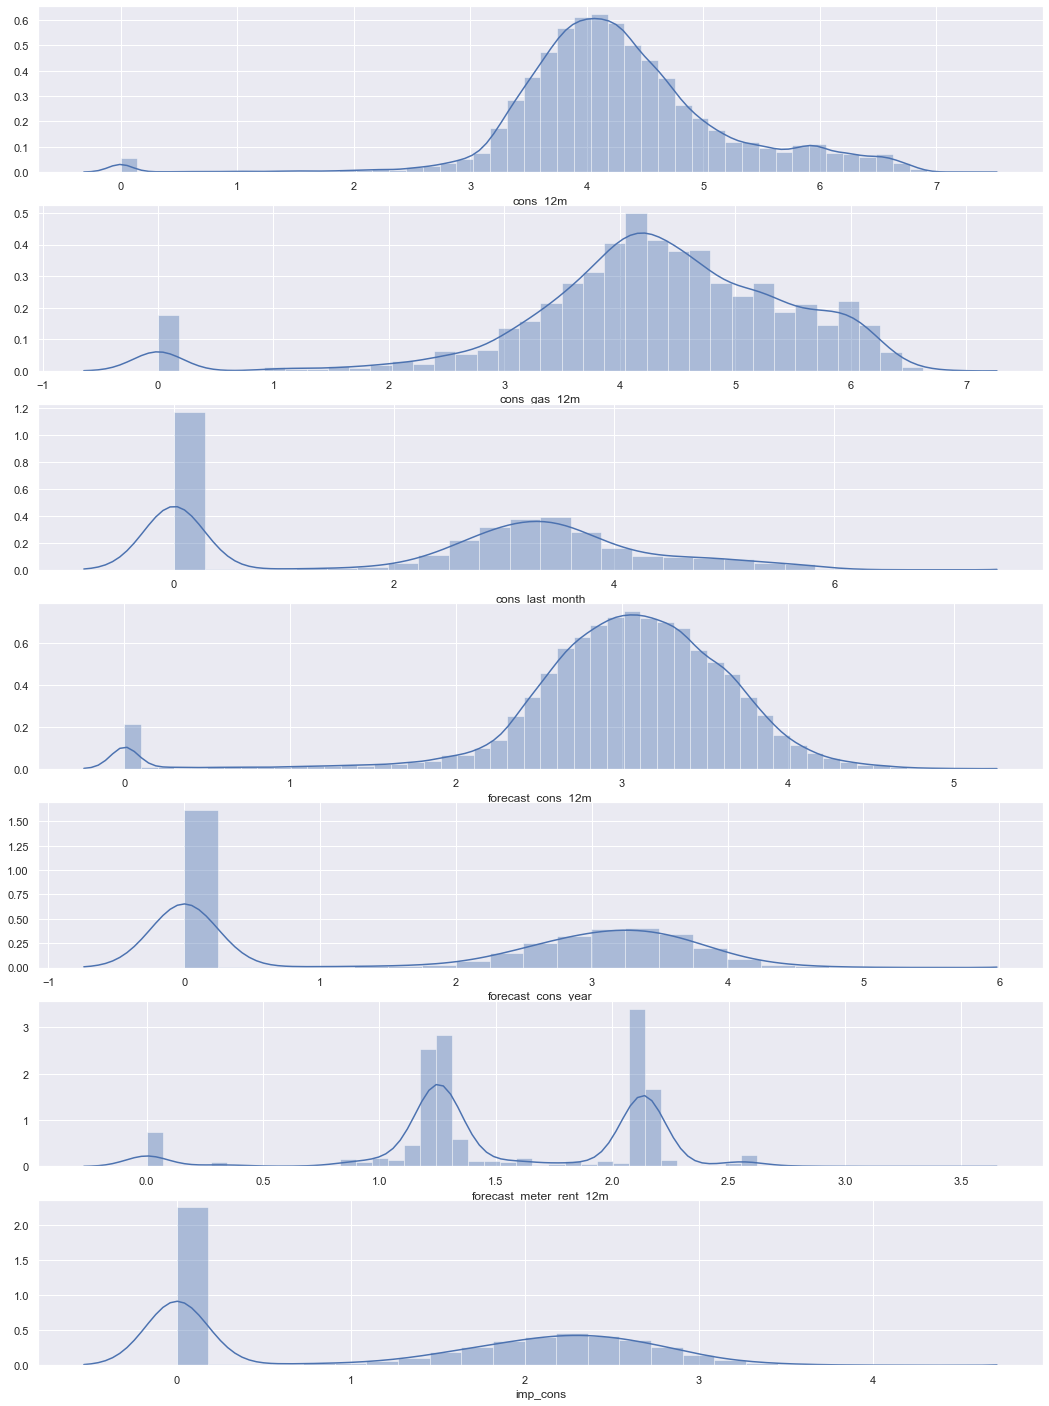

In [63]:
fig,axs=plt.subplots(nrows=7,figsize=(18,25))
sns.distplot((train_data['cons_12m'].dropna()),ax=axs[0])
sns.distplot((train_data[train_data['has_gas']==1]['cons_gas_12m'].dropna()),ax=axs[1])
sns.distplot((train_data['cons_last_month'].dropna()),ax=axs[2])
sns.distplot((train_data['forecast_cons_12m'].dropna()),ax=axs[3])
sns.distplot((train_data['forecast_cons_year'].dropna()),ax=axs[4])
sns.distplot((train_data['forecast_meter_rent_12m'].dropna()),ax=axs[5])
sns.distplot((train_data['imp_cons'].dropna()),ax=axs[6])

# High correlation variables

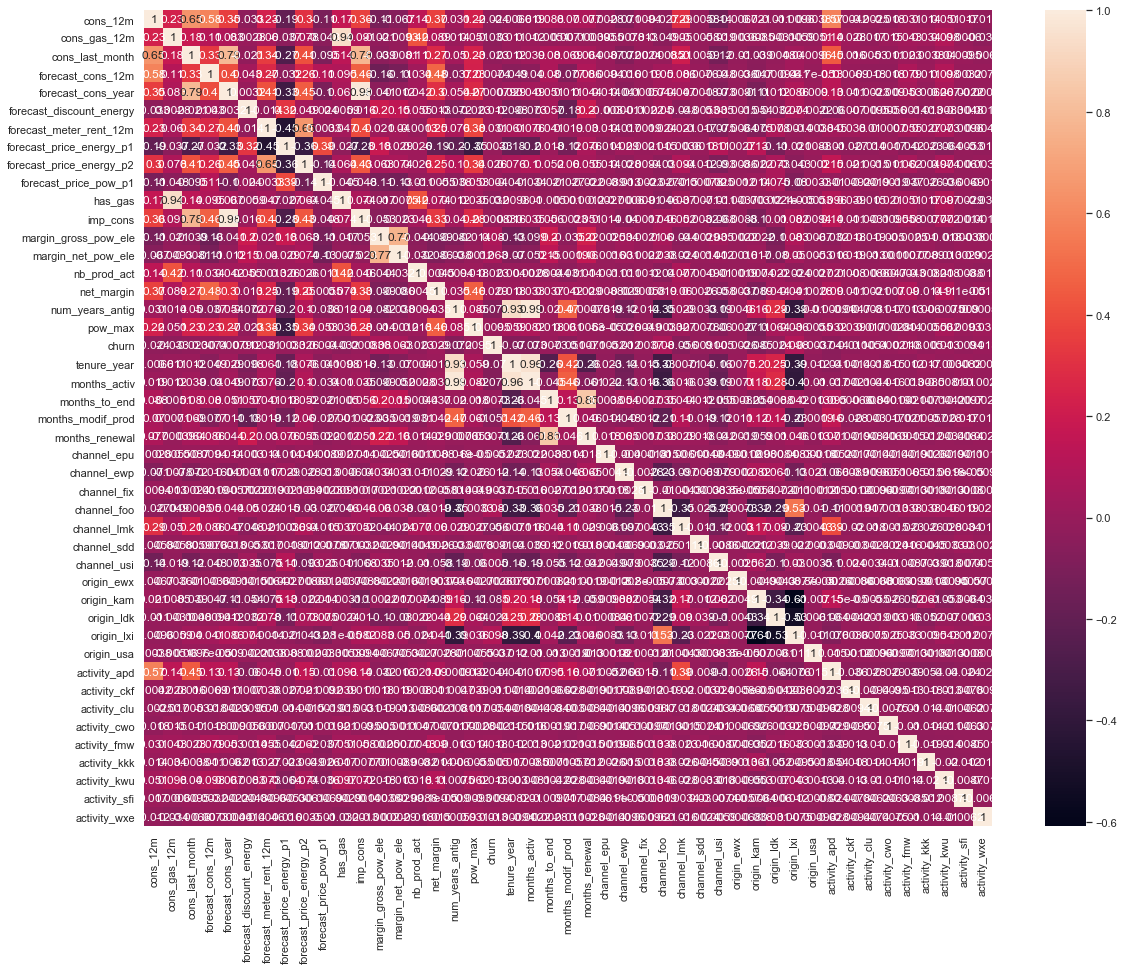

In [64]:
plt.figure(figsize=(19,15))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

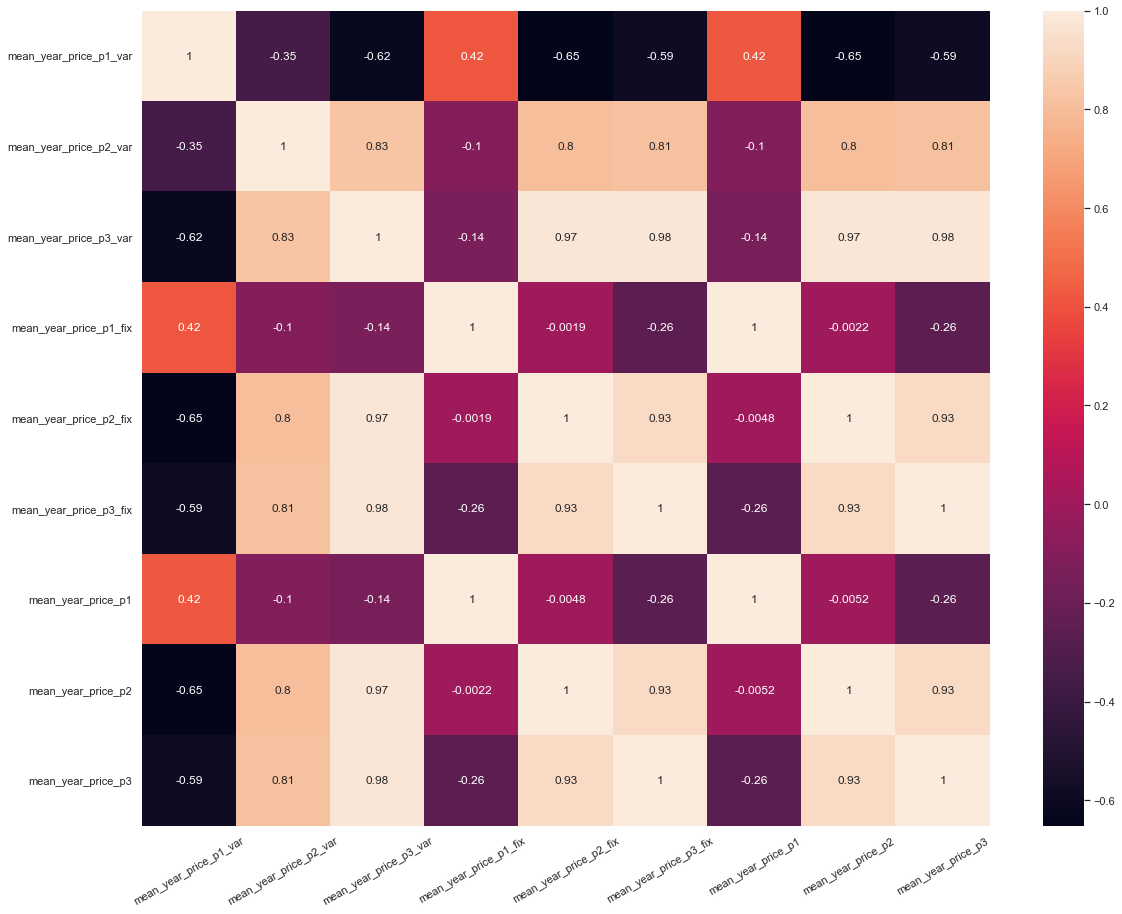

In [65]:
plt.figure(figsize=(19,15))
sns.heatmap(mean_year.corr(),annot=True)
plt.xticks(rotation=30)
plt.show()

In [66]:
#remove variables with high correlation
train_data.drop(columns=['num_years_antig','forecast_cons_year'],inplace=True)

# Outliers

Criterias to identify outliers:
* Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile (IQR method)
* Data point that falls outside of 3 standard deviations. (Z score)

In [67]:
def find_replace_outliers(dataframe, column, z=3):
    
    df=dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])
    
    from scipy.stats import zscore
    # calculate mean without outliers
    df['zscore']=zscore(df[column])
    mean_=df[(df['zscore']>-z) & (df['zscore']<z)][column].mean()
    
    # replace outliers with mean
    dataframe[column]=dataframe[column].fillna(mean_)
    dataframe['zscore']=zscore(dataframe[column])
    no_outliers=dataframe[(dataframe['zscore']<-z)|(dataframe['zscore']>z)].shape[0]
    dataframe.loc[(dataframe['zscore']<-z)|(dataframe['zscore']>z), column]=mean_
    print('Replaced:', no_outliers, 'outliers in', column)
    return dataframe.drop(columns='zscore')

In [68]:
for c in mean_year:
    if c!= 'id':
        mean_year=find_replace_outliers(mean_year, c)

Replaced: 276 outliers in mean_year_price_p1_var
Replaced: 0 outliers in mean_year_price_p2_var
Replaced: 0 outliers in mean_year_price_p3_var
Replaced: 120 outliers in mean_year_price_p1_fix
Replaced: 0 outliers in mean_year_price_p2_fix
Replaced: 0 outliers in mean_year_price_p3_fix
Replaced: 122 outliers in mean_year_price_p1
Replaced: 0 outliers in mean_year_price_p2
Replaced: 0 outliers in mean_year_price_p3


In [69]:
mean_year.reset_index(drop=True, inplace=True)

In [70]:
def find_replace_outliers_(dataframe, column, z=3):
    
    df=dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])
    
    from scipy.stats import zscore
    # calculate mean without outliers
    df['zscore']=zscore(df[column])
    mean_=df[(df['zscore']>-z) & (df['zscore']<z)][column].mean()
    
    # replace outliers with mean
    no_outliers=dataframe[column].isnull().sum()
    dataframe[column]=dataframe[column].fillna(mean_)
    dataframe['zscore']=zscore(dataframe[column])
    dataframe.loc[(dataframe['zscore']<-z)|(dataframe['zscore']>z), column]=mean_
    print('Replaced:', no_outliers, 'outliers in', column)
    return dataframe.drop(columns='zscore')

In [71]:
train_data.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'pow_max', 'churn', 'tenure_year', 'months_activ',
       'months_to_end', 'months_modif_prod', 'months_renewal', 'channel_epu',
       'channel_ewp', 'channel_fix', 'channel_foo', 'channel_lmk',
       'channel_sdd', 'channel_usi', 'origin_ewx', 'origin_kam', 'origin_ldk',
       'origin_lxi', 'origin_usa', 'activity_apd', 'activity_ckf',
       'activity_clu', 'activity_cwo', 'activity_fmw', 'activity_kkk',
       'activity_kwu', 'activity_sfi', 'activity_wxe'],
      dtype='object')

In [72]:
train_data=find_replace_outliers_(train_data, 'cons_12m', z=3)
train_data=find_replace_outliers_(train_data, 'cons_gas_12m', z=3)
train_data=find_replace_outliers_(train_data, 'cons_last_month', z=3)
train_data=find_replace_outliers_(train_data, 'forecast_cons_12m', z=3)
train_data=find_replace_outliers_(train_data, 'forecast_discount_energy',z=3)
train_data=find_replace_outliers_(train_data, 'forecast_meter_rent_12m', z=3)
train_data=find_replace_outliers_(train_data, 'forecast_price_energy_p1', z=3)
train_data=find_replace_outliers_(train_data, 'forecast_price_energy_p2', z=3)
train_data=find_replace_outliers_(train_data, 'forecast_price_pow_p1', z=3)
train_data=find_replace_outliers_(train_data, 'imp_cons', z=3)
train_data=find_replace_outliers_(train_data, 'margin_gross_pow_ele', z=3)
train_data=find_replace_outliers_(train_data, 'margin_net_pow_ele',  z=3)
train_data=find_replace_outliers_(train_data, 'net_margin', z=3)
train_data=find_replace_outliers_(train_data, 'pow_max', z=3)
train_data=find_replace_outliers_(train_data, 'months_activ', z=3)
train_data=find_replace_outliers_(train_data, 'months_to_end', z=3)
train_data=find_replace_outliers_(train_data, 'months_modif_prod', z=3)
train_data=find_replace_outliers_(train_data, 'months_renewal', z=3)

Replaced: 27 outliers in cons_12m
Replaced: 6 outliers in cons_gas_12m
Replaced: 46 outliers in cons_last_month
Replaced: 41 outliers in forecast_cons_12m
Replaced: 126 outliers in forecast_discount_energy
Replaced: 4 outliers in forecast_meter_rent_12m
Replaced: 126 outliers in forecast_price_energy_p1
Replaced: 126 outliers in forecast_price_energy_p2
Replaced: 126 outliers in forecast_price_pow_p1
Replaced: 27 outliers in imp_cons
Replaced: 13 outliers in margin_gross_pow_ele
Replaced: 13 outliers in margin_net_pow_ele
Replaced: 15 outliers in net_margin
Replaced: 3 outliers in pow_max
Replaced: 0 outliers in months_activ
Replaced: 0 outliers in months_to_end
Replaced: 0 outliers in months_modif_prod
Replaced: 0 outliers in months_renewal


In [73]:
train_data.reset_index(drop=True, inplace=True)

# Picking

In [74]:
PICKLE_TRAIN_DIR=os.path.join("..", 'processed_data', 'train_data.pkl')
PICKLE_PRICING_DIR=os.path.join("..", 'processed_data', 'pricing_data.pkl')

In [76]:
pd.to_pickle(train_data,PICKLE_TRAIN_DIR)
pd.to_pickle(mean_year, PICKLE_PRICING_DIR)